## Chapter 10 Prediction and Machine Learning

### Preprocessing

In [1]:
import numpy as np
from sklearn import preprocessing
from scipy.stats import anderson

In [42]:
rain = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')

In [53]:
len(rain)

39139

In [54]:
rain = 0.1*rain

In [55]:
rain[rain<0] = .05/2

In [23]:
rain.mean()

2.179195942665883

In [24]:
rain.var()

18.803443919014683

In [25]:
anderson(rain)

AndersonResult(statistic=5731.267850009339, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [28]:
scaled = preprocessing.scale(rain)

In [30]:
scaled.mean()

3.4130160280768244e-17

In [31]:
scaled.var()

1.0

In [32]:
anderson(scaled) # if anderson result statistic < critical_values , it means the data sample is normalized

AndersonResult(statistic=5731.267850009339, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [35]:
print(anderson(scaled).statistic)

5731.267850009339


In [37]:
print(anderson(scaled).critical_values)

[0.576 0.656 0.787 0.918 1.092]


In [39]:
for value in anderson(scaled).critical_values:
    if anderson(scaled).statistic > value:
        print('None normalized sample')

None normalized sample
None normalized sample
None normalized sample
None normalized sample
None normalized sample


In [73]:
binarized = preprocessing.binarize(rain.reshape(-1, 1))

In [74]:
binarized

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [76]:
print(np.unique(binarized),rain.sum())

[0. 1.] 85291.55


In [77]:
lb = preprocessing.LabelBinarizer()

In [78]:
lb.fit(rain.astype(int))

LabelBinarizer()

In [79]:
lb.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52,
       53, 55, 58, 61, 62])

### Logistic regression classifier

In [1]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import KFold

In [4]:
from sklearn import datasets

In [5]:
import numpy as np

In [123]:
def classify(x,y):
    clf = LogisticRegression(random_state=12)
    scores = []
    kf = KFold(n_splits=2, random_state=None, shuffle=False)
    for train,test in kf.split(x):
        clf.fit(x[train],y[train])
        scores.append(clf.score(x[test],y[test]))
    print(np.mean(scores))
    print(clf.score([[7.7,3.4]],[0]))
    print(clf.score([[7.7,3.4]],[1]))
    print(clf.score([[7.7,3.4]],[2]))

    
                     
                     

In [124]:
rain = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')

In [125]:
dates = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/doy.npy')

In [126]:
x = np.vstack((dates[:-1],rain[:-1]))
y = np.sign(rain[1:])

In [127]:
x

array([[ 1,  2,  3, ..., 84, 85, 86],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [128]:
rain # 0 mean no rain , -1 means weak rain , int means real rain 

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int16)

In [129]:
x.T

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       ...,
       [84,  0],
       [85,  0],
       [86,  0]], dtype=int16)

In [130]:
y

array([ 0,  0,  1, ...,  0,  0, -1], dtype=int16)

In [131]:
classify(x.T,y)

0.5737135264959885
1.0
0.0
0.0


In [132]:
iris = datasets.load_iris()

In [133]:
x = iris.data[:,:2]

In [134]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [135]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [136]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
classify(x,y) # class 0 1 2 possibility

0.22
0.0
1.0
0.0


### Support Vector Machines, SVM

In [205]:
from sklearn.svm import SVC

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
from sklearn import datasets

In [208]:
import numpy as np
from pprint import PrettyPrinter as pp

In [225]:
def classify(x,y):
    clf = GridSearchCV(SVC(random_state = 42, max_iter = 100),{'kernel':['linear','poly','rbf'],'C':[1,10]})
    clf.fit(x,y)
    print("Score",clf.score(x,y))
    pp().pprint(clf.cv_results_)
    print(clf.score([[7.7,3.]],[0]))
    print(clf.score([[7.7,3.]],[1]))
    print(clf.score([[7.7,3.]],[2]))

In [226]:
rain = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')

In [227]:
dates = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/doy.npy')

In [228]:
x = np.vstack((dates[:-1],rain[:-1]))
y = np.sign(rain[1:])

In [229]:
classify(x.T,y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base

Score 0.4752925545505647
{'mean_fit_time': array([0.23419738, 0.26822567, 0.35165329, 0.16530919, 0.28397121,
       0.35486073]),
 'mean_score_time': array([0.0596601 , 0.06874399, 0.38178349, 0.04136057, 0.07191477,
       0.3827559 ]),
 'mean_test_score': array([0.42610763, 0.53735336, 0.28585569, 0.29270417, 0.53349511,
       0.28585569]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
            {'C': 1, 'kernel': 'poly'},
            {'C': 1, 'kernel': 'rbf'},
            {'C': 10, 'kernel': 'linear'},
            {'C': 10, 'kernel': 'poly'},
            {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([3, 1, 5, 4, 2, 5

In [230]:
iris = datasets.load_iris()

In [231]:
x = iris.data[:,:2]
y = iris.target

In [232]:
classify(x,y)

Score 0.82
{'mean_fit_time': array([0.00120273, 0.00126104, 0.00130348, 0.00119023, 0.00115423,
       0.00115609]),
 'mean_score_time': array([0.00041623, 0.00056944, 0.0006391 , 0.00046043, 0.00050344,
       0.00053072]),
 'mean_test_score': array([0.80666667, 0.73333333, 0.82      , 0.76666667, 0.59333333,
       0.81333333]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
            {'C': 1, 'kernel': 'poly'},
            {'C': 1, 'kernel': 'rbf'},
            {'C': 10, 'kernel': 'linear'},
            {'C': 10, 'kernel': 'poly'},
            {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([3, 5, 1, 4, 6, 2], dtype=int32

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base

### ElasticsNetCV for regression

In [233]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [234]:
from sklearn.linear_model import ElasticNetCV

In [252]:
def regress(x,y,title):
    clf = ElasticNetCV(max_iter = 200, cv = 10, l1_ratio = [.1,.5,.7,.9,.95,.99,1])
    clf.fit(x,y)
    print("Score",clf.score(x,y))
    
    pred = clf.predict(x)
    plt.title("Scatter plot of prediction and "+title)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.scatter(y,pred)

    #show perfect fit line
    if "Boston" in title:
        plt.plot(y,y,label = "Perfect fit")
        plt.legend()
        
    plt.grid(True)
    plt.show()

In [254]:
rain = .1*np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')

In [255]:
dates = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/doy.npy')

In [256]:
rain[rain<0] = 0.05/2

In [257]:
x = np.vstack((dates[:-1],rain[:-1]))
y = rain[1:]

Score 0.05278387609419821


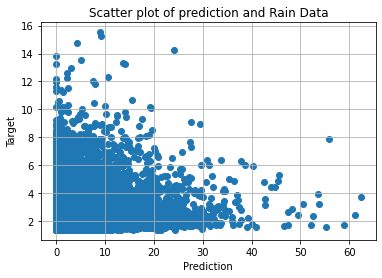

In [258]:
regress(x.T,y,'Rain Data')

In [259]:
boston = datasets.load_boston()

In [260]:
x = boston.data
y = boston.target

Score 0.6831524128217573


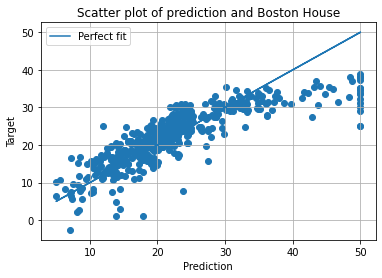

In [261]:
regress(x,y,'Boston House')

### Support Vector Regression
    This chapter is a method to determin if learning curve is overfited or gradient explore
    after a training , we can use this tool to verify the training result.

In [265]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn import preprocessing
import multiprocessing
import matplotlib.pyplot as plt

In [296]:
def regress(x,y,ncpus,title):
    X = preprocessing.scale(x)
    Y = preprocessing.scale(y)
    clf = SVR(max_iter=ncpus *200)
    
    train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, n_jobs=ncpus)
    
    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
    plt.plot(train_sizes, test_scores.mean(axis=1),'--',label='Test Score')
    print('Max test score '+title,test_scores.max())
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

In [297]:
rain = .1*np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')
rain[rain<0] = 0.05/2
dates = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/doy.npy')

In [298]:
x = np.vstack((dates[:-1],rain[:-1]))
y = rain[1:]

In [299]:
ncpus = multiprocessing.cpu_count()

In [300]:
ncpus

12

Max test score Rain 0.023114680099581397


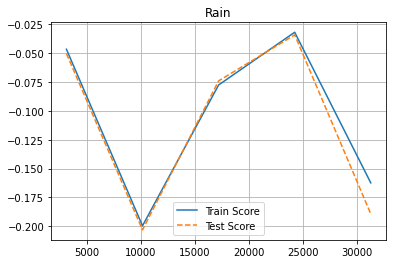

In [301]:
regress(x.T, y, ncpus, "Rain")

    Learning curve show the training model is bad , both train score and test score are all bad

Max test score Boston 0.7496566891226578


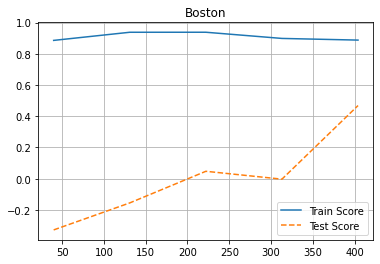

In [302]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
regress(x,y,ncpus,'Boston')

    learning curve indicates that trainning model is good , also max teset score showes it

### Affinity Propagation Aggresive Cluster
    an nonsupervised learning 

In [432]:
from sklearn import datasets
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

In [543]:
x, _ = datasets.make_blobs(n_samples=200, centers=2,n_features=2, random_state=10)


    centers means in 2D how many clusters will be generated, features means 2D

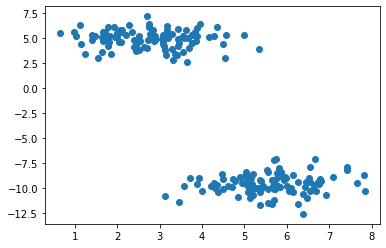

In [544]:
x1=[]
y1=[]
for xx in x:
    x1.append(xx[0])
    y1.append(xx[1])

plt.scatter(x1,y1)

In [545]:
S = euclidean_distances(x)

In [546]:
aff_pro = cluster.AffinityPropagation().fit(S)

/usr/local/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


In [547]:
labels = aff_pro.labels_

In [548]:
styles = ['o','x','^','.']

0
1


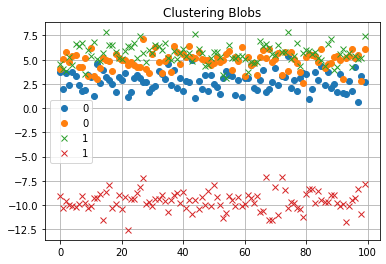

In [549]:
for style, label in zip(styles, np.unique(labels)):
    print(label)
    plt.plot(x[labels == label], style, label=label)
    
plt.title("Clustering Blobs")
plt.grid('True')
plt.legend(loc='best')
plt.show()

In [550]:
labels 

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

    labels means cluster IDs , use affinity propagration to cluster all datas in a EU space with instance to center
    labels count is unpredictable , should be based on data set samples.
    Note, EU space is multi dimention space , in this case, 100X100 3D

In [551]:
for label in np.unique(labels):
    print(x[labels == label])

[[3.68694933 4.00587983]
 [1.95034397 5.06021721]
 [3.63067594 5.79129833]
 [2.40646283 4.80478485]
 [3.7741009  5.3482002 ]
 [3.29191362 5.45331195]
 [2.4330084  4.28102101]
 [1.78177778 4.1933899 ]
 [1.83745619 5.18652838]
 [3.40347215 3.27767616]
 [3.17615388 6.17042825]
 [1.23066582 3.36722729]
 [4.53591637 2.99244115]
 [2.63658216 4.1290614 ]
 [3.89014626 5.15872503]
 [3.20718966 4.98017969]
 [2.88029427 4.83101311]
 [2.50888941 3.82726539]
 [1.66824835 5.56753074]
 [3.1768916  5.16440887]
 [2.86590068 4.98010256]
 [3.65956252 5.00430502]
 [1.15788902 4.43735912]
 [1.66639614 4.71854403]
 [3.06969069 4.39996079]
 [3.42958656 4.24667843]
 [3.11132994 4.19373446]
 [2.69877229 7.17704409]
 [2.69906123 4.00637198]
 [1.64235649 3.61838009]
 [2.08850954 5.57809992]
 [2.27149188 6.31825694]
 [3.86128145 4.73033226]
 [3.5573323  3.58925512]
 [3.04827025 4.89216241]
 [4.57526874 5.25568304]
 [2.43788247 3.71524985]
 [3.94265598 6.37341563]
 [2.10945903 5.83090641]
 [3.07543379 4.60331623]


    It is really useful for abnormal detection , root cause analysis , an non supervised learning

### Mean Shift Clustering

In [555]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import pandas as pd

In [556]:
rain = .1*np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/rain.npy')
rain[rain<0] = 0.05/2
dates = np.load('/Users/alfeng_1/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_10_Code/code10/doy.npy')
x = np.vstack((dates,rain))
y = rain[1:]

In [557]:
df = pd.DataFrame.from_records(x.T, columns=['dates','rain'])

In [558]:
df = df.groupby('dates').mean()

<AxesSubplot:xlabel='dates'>

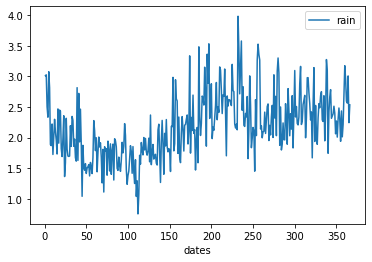

In [559]:
df.plot()

In [591]:
x = np.vstack((np.arange(1, len(df)+1), df.values.ravel()))

In [592]:
x = x.T

In [593]:
ms = cluster.MeanShift()
ms.fit(x)

MeanShift()

In [594]:
labels = ms.predict(x)

In [606]:
plt.figure()
grays = ['0','0.25','0.5','0.75']

<Figure size 432x288 with 0 Axes>

In [607]:
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [608]:
np.unique(labels)

array([0, 1, 2, 3])

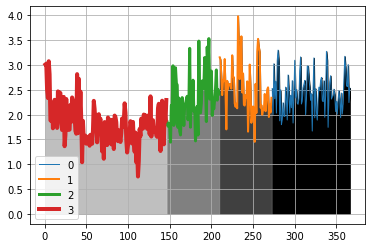

In [609]:
for gray, label in zip(grays, np.unique(labels)):
    match = labels == label
    x0 = x[:,0]
    x1 = x[:,1]
    plt.plot(x0[match], x1[match], lw=label+1, label=label)
    plt.fill_between(x0, x1, where=match, color=gray)
plt.grid(True)
plt.legend()
plt.show()

### Evolutionary Algorithm

In [19]:
import array
import random
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [20]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [21]:
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMax)

In [25]:
dir(creator.FitnessMax)

['__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'delValues',
 'dominates',
 'getValues',
 'setValues',
 'valid',
 'values',
 'weights',
 'wvalues']

In [33]:
dir(creator.Individual)

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'buffer_info',
 'byteswap',
 'count',
 'extend',
 'frombytes',
 'fromfile',
 'fromlist',
 'fromstring',
 'fromunicode',
 'index',
 'insert',
 'itemsize',
 'pop',
 'remove',
 'reverse',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'tounicode',
 'typecode']

In [37]:
toolbox = base.Toolbox()

In [41]:
toolbox.register("attr_float", random.random)

In [44]:
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 200)

In [46]:
toolbox.register("populate", tools.initRepeat, list, toolbox.individual)

In [48]:
def eval(individual):
    return shapiro(individual)[1],

In [49]:
toolbox.register("evaluate", eval)
toolbox.register("mate", tools.cxTwoPoint)

In [51]:
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)

In [53]:
toolbox.register("select", tools.selTournament, tournsize=4)

In [54]:
random.seed(42)

In [55]:
pop = toolbox.populate(n=400)

In [58]:
hof = tools.HallOfFame(1)

In [63]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [64]:
stats.register("max", np.max)

In [65]:
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=80, stats=stats, halloffame=hof)

gen	nevals	max        
0  	400   	0.000484774
1  	222   	0.000656187
2  	246   	0.00745961 
3  	239   	0.00745961 
4  	240   	0.0184182  
5  	216   	0.0309736  
6  	237   	0.06957    
7  	243   	0.06957    
8  	231   	0.224381   
9  	226   	0.224381   
10 	247   	0.224381   
11 	228   	0.247313   
12 	241   	0.28318    
13 	242   	0.354144   
14 	246   	0.46282    
15 	239   	0.46282    
16 	266   	0.480937   
17 	233   	0.648529   
18 	266   	0.703452   
19 	229   	0.742139   
20 	249   	0.791523   
21 	227   	0.795744   
22 	241   	0.856505   
23 	237   	0.898701   
24 	242   	0.949595   
25 	237   	0.949595   
26 	249   	0.950638   
27 	245   	0.961397   
28 	226   	0.974227   
29 	235   	0.974227   
30 	239   	0.99192    
31 	225   	0.99192    
32 	252   	0.99192    
33 	255   	0.992183   
34 	234   	0.995053   
35 	250   	0.995053   
36 	228   	0.995053   
37 	252   	0.995466   
38 	228   	0.996523   
39 	265   	0.996992   
40 	221   	0.99771    
41 	238   	0.998339   
42 	248   	

([Individual('d', [0.5967397000323125, 0.2664905715748901, 0.6150320292219568, 0.4281967937428599, 0.004976527193655378, 0.2637088789317744, 0.5119988279793294, 0.4293987690905233, 0.267622688217965, 0.7454231087454316, 0.7296825037169442, 0.5833432521727351, 0.35660924201844046, 0.437265409159319, 0.45381706682337364, 0.6700209563490259, 0.625102377719512, 0.8669696064363775, 0.24250296709483787, 0.6618710128430159, 0.5501464652789848, 0.625086548630321, 0.17734694199137724, 0.4718977125762216, 0.23205334213533535, 0.34622011244667883, 0.6215672623314837, 0.42654560767318817, 0.5029989212733883, 0.4525890928598675, 0.39660082047604683, 0.8059809054252487, 0.27645370443181083, 0.5705515401086556, 0.15917350534120622, 0.34654863291493, 0.383577850931187, 0.6782013228569693, 0.581962256487287, 0.7419958506369226, 0.25363272623198396, 0.6081151048450613, 0.42356154743336316, 0.3656440944364717, 0.7541112854093114, 0.47587901795476817, 0.44354556263909095, 0.7195455408437261, 0.51761805282

In [67]:
print(shapiro(hof[0])[1])

0.9988605380058289


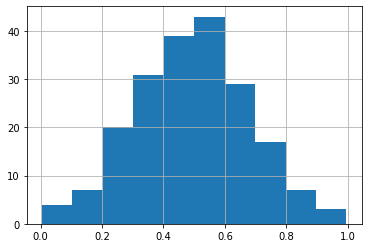

In [72]:
plt.hist(hof[0])
plt.grid(True)